This is an exploratory data analysis for an omdena project: Local News Aggregator and Analyzer for Kitwe, Zambia.




Main insights from this notebook:


*   There are around 12,000 articles going into the making of this analysis
*   There is a class imbalance of fake to real news (approx. 8000 fake: 4000 real)
*   There is a potential source bias, where around 6,000 articles come from Lusaka Times and the next highest sources is Lusaka Voice with around 2,000 articles.  A magnitude of three difference between the highest sources could be problematic if there is a credibility issue.
*   Articles only start to surface online around 2010 till present, meaning that there is a lot of language from previous political/economic times that is not captured by the model.  This lack of information may have issues on the credibility of the model.







## Run this to save the notebook to DagsHub 👇

In [ ]:
# Install the DagsHub python client
!pip install -q dagshub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.2/252.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 408.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
from dagshub.notebook import save_notebook

save_notebook(repo="kalumbalighton/KitweChapter_LocalNewsAggregatorAnalyzer", path=".")

Import Pandas to manipulate Data
Matplotlib.pyplot, numpy, and seaborn for potential mathematical and visual demonstrations

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/My Drive/final_data.csv')

In [ ]:
df.head()

,Source,Category,Headline,Link,Description,Date,Author,Target_final
0,daily mail zambia,education,k8 million cbu hall building start,https://www.daily-mail.co.zm/2024/10/15/k8-mil...,mwila ntambi kitwe copperbelt university cbu k...,2024-10-15 06:41:52+00:00,Website Editor,0
1,daily mail zambia,politics,exercise aimed recruiting 300000 member province,https://www.daily-mail.co.zm/2024/10/15/exerci...,melody mupeta kitwe united party national deve...,2024-10-15 06:17:07+00:00,Website Editor,0
2,flava fm,local news,charcoal trader chimwemwe township appeal gove...,https://flavaradioandtv.com/charcoal-traders-i...,pa group charcoal trader cmml area kitwe’s chi...,2024-05-13 08:00:53+00:00,Newsroom,0
3,flava fm,development,ecologist warns urbanisation’s dire impact bio...,https://flavaradioandtv.com/ecologist-warns-of...,pecologist mutende simwanza ha raised alarm de...,2024-03-26 08:33:05+00:00,Newsroom,0
4,flava fm,politics,copperbelt minister urge mopani settle debt ki...,https://flavaradioandtv.com/copperbelt-ministe...,pcopperbelt minister elisha matambo ha issued ...,2024-03-14 10:18:04+00:00,Newsroom,0


Begin inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12346 entries, 0 to 12345
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Source        12346 non-null  object
 1   Category      12346 non-null  object
 2   Headline      12345 non-null  object
 3   Link          12346 non-null  object
 4   Description   12346 non-null  object
 5   Date          12346 non-null  object
 6   Author        12346 non-null  object
 7   Target_final  12346 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 771.8+ KB


In [ ]:
df.describe()

,Target_final
count,12346.000000
mean,0.341649
std,0.474282
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df = df.rename(columns={'Target_final':'Label'})

In [ ]:
df.isna().any()

,0
Source,False
Category,False
Headline,True
Link,False
Description,False
Date,False
Author,False
Label,False
Year,False


In [ ]:
df.Label.value_counts()

,count
Label,
0,8128
1,4218


There's a class imbalance, with twice as much fake news as real news

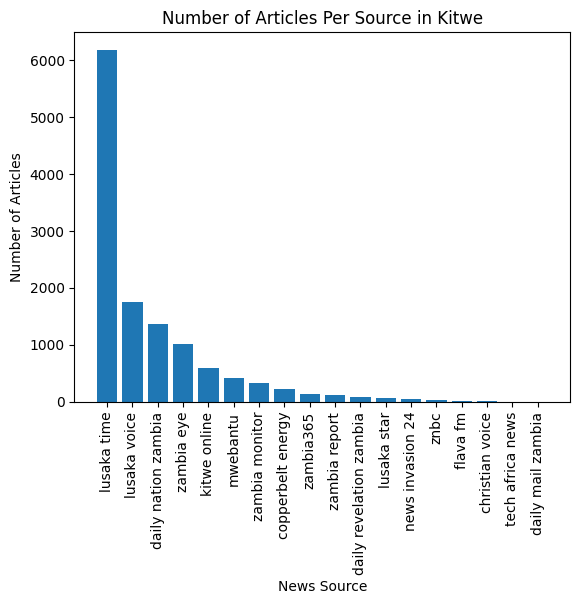

In [ ]:
plt.bar(height=df.Source.value_counts().values, x=df.Source.value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('News Source')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Per Source in Kitwe')
plt.show()

There is a Source Imbalance, with Lusaka Times Dominating the Source

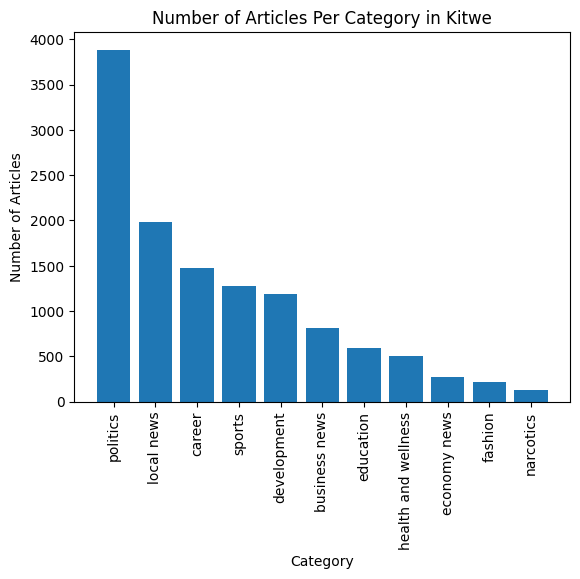

In [ ]:
plt.bar(height=df.Category.value_counts().values, x=df.Category.value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Per Category in Kitwe')
plt.show()

There is an imbalance in categories as well, but for the context of providing real news, most likely Political information is the most important to be covered and correctly identified in this model

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Year'] = df['Date'].dt.year

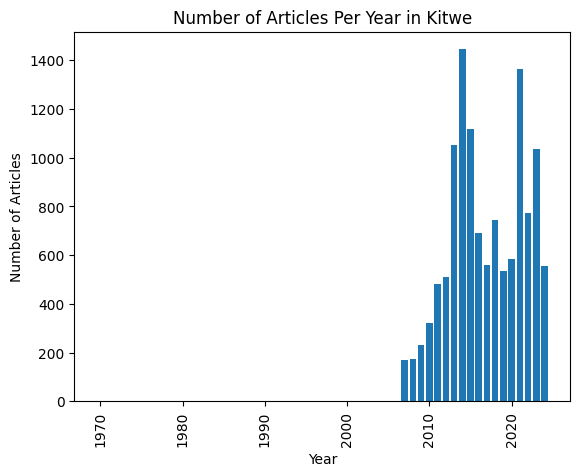

In [ ]:
plt.bar(height=df.Year.value_counts().values, x=df.Year.value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Per Year in Kitwe')
plt.show()

There is an imbalance towards 2010 +, which makes sense given the context of the project; Kitwe is working on becoming more connected with the internet as of recently, so there are going to be less online articles coming from Kitwe as such

Lets do cross tabulations with Year and Source, and then Year and Category

In [ ]:
pd.crosstab(df.Year, df.Source)

Source,christian voice,copperbelt energy,daily mail zambia,daily nation zambia,daily revelation zambia,flava fm,kitwe online,lusaka star,lusaka time,lusaka voice,mwebantu,news invasion 24,tech africa news,zambia eye,zambia monitor,zambia report,zambia365,znbc
Year,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,0,0,0,169,0,0,0,0,0,0,0,0,0
2008,0,0,0,0,0,0,0,0,173,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,232,0,0,0,0,0,0,0,0,0
2010,0,1,0,0,0,0,92,0,229,0,0,0,0,0,0,0,0,0
2011,0,2,0,0,0,0,143,0,338,0,0,0,0,0,0,0,0,0
2012,0,6,0,0,0,0,108,2,374,5,0,0,0,14,0,0,0,0
2013,0,3,0,0,0,0,94,1,458,397,0,0,0,101,0,0,0,0
2014,0,10,0,0,0,0,31,3,583,700,0,0,0,118,0,0,0,0


Based off of this: Daily Nation Zambia has picked up writing in the past 4 years, Kitwe Online was more active ten or so years ago, Lusaka Times has been very active since 2007, Lusaka Voice was more active ten or so years ago, Mwebantu has picked up publishing in the past five years, and Zambia eye was also pretty active ten years ago


In [ ]:
pd.crosstab(df.Year, df.Category)

Category,business news,career,development,economy news,education,fashion,health and wellness,local news,narcotics,politics,sports
Year,,,,,,,,,,,
1970,0,0,0,0,0,1,0,0,0,1,0
2007,5,25,15,5,3,0,2,46,3,29,36
2008,6,10,14,2,6,1,5,40,3,55,31
2009,12,17,29,8,10,3,14,37,1,70,31
2010,18,28,38,12,22,3,14,70,5,87,25
2011,40,54,56,1,31,15,19,75,12,126,54
2012,44,85,37,9,26,4,24,92,7,114,67
2013,78,149,108,15,57,19,35,173,22,260,138
2014,76,138,165,19,70,13,59,254,9,473,169


These category patterns are pretty concurrent with the density of articles per year, where there is just moer of every kind of category around 2013, 2014 era